**PPMI_Preprocessing_2_UPDRS**


"""
PPMI UPDRS Prediction – Data Preprocessing Summary (Lab 2)

This script starts with the merged PPMI dataset previously prepared in Preprocessing Lab 1.
In this lab (Lab 2), we focused on cleaning, imputing, and preparing the data for modeling.
Key steps completed include:

1. **Initial Cleaning**:
   - Removed patients (rows) with >40% missing values.
   - Dropped features (columns) with >40% missing values.
2. **Missing Data Imputation**:
   - Applied KNN imputation to fill in remaining missing values.
3. **Feature Engineering**:
   - Computed normalized brain region volumes (e.g., hippocampus, putamen).
   - Combined left/right hemisphere values into total volumes (e.g., `Hippocampus_Total_norm`).
4. **Feature Selection**:
   - Retained clinically and biologically relevant features for modeling Parkinson’s progression.
   - Dropped irrelevant or low-informative variables (e.g., scan IDs, raw volume measures without normalization).
5. **Standardization**:
   - Standardized features to ensure uniform scaling for machine learning models.

The final dataset (`final_df_cleaned`) with shape (1716, 109) is now ready for Experiment 1: Predicting UPDRS scores.
"""


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("merged_ppmi_dataset.csv")

In [ ]:
df.head()

,PATNO,SEX,AGE,CAUDATE_L,CAUDATE_R,PUTAMEN_L,PUTAMEN_R,EVENT_ID_x,Left_WM_hypointensities,Brain_Stem,...,rh_supramarginal,rh_frontalpole,rh_temporalpole,rh_transversetemporal,rh_insula,rh_MeanThickness,NP3TOT,NHY,APOE4,COHORT_DEFINITION
0,3000,0,69.1,3.43,2.99,2.63,2.94,BL,0.0,20725.6,...,2.216,2.402,4.123,2.293,2.848,2.32243,4.0,0.0,0.0,Healthy Control
1,3001,1,65.1,1.92,2.00,0.65,0.80,BL,0.0,23802.3,...,2.231,2.486,3.840,2.271,2.756,2.28570,12.0,1.0,0.0,Parkinson's Disease
2,3002,0,67.6,3.72,2.92,1.78,1.01,BL,0.0,19271.1,...,2.561,2.530,3.501,2.545,3.040,2.45438,17.0,2.0,0.0,Parkinson's Disease
3,3003,0,56.6,2.54,3.63,0.68,1.11,BL,0.0,22191.0,...,2.399,2.496,3.946,2.756,2.909,2.41209,29.0,2.0,1.0,Parkinson's Disease
4,3004,1,59.3,5.30,5.09,2.97,3.54,BL,0.0,24473.0,...,2.250,2.511,3.568,2.356,2.929,2.39909,2.0,0.0,0.0,Healthy Control


In [ ]:
df.columns

Index(['PATNO', 'SEX', 'AGE', 'CAUDATE_L', 'CAUDATE_R', 'PUTAMEN_L',
       'PUTAMEN_R', 'EVENT_ID_x', 'Left_WM_hypointensities', 'Brain_Stem',
       ...
       'rh_supramarginal', 'rh_frontalpole', 'rh_temporalpole',
       'rh_transversetemporal', 'rh_insula', 'rh_MeanThickness', 'NP3TOT',
       'NHY', 'APOE4', 'COHORT_DEFINITION'],
      dtype='object', length=147)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary stats
missing_counts = df.isna().sum()
missing_perc = (missing_counts / len(df)) * 100

# Sort and display
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_perc
}).sort_values(by='Missing %', ascending=False)

# Quick look at top missing features
print(missing_summary.head(20))


                               Missing Count  Missing %
Left_WM_hypointensities                 3568  67.562962
Brain_Stem                              3568  67.562962
Left_non_WM_hypointensities             3568  67.562962
CC_Central                              3568  67.562962
5th_Ventricle                           3568  67.562962
Right_choroid_plexus                    3568  67.562962
EVENT_ID_x                              3568  67.562962
Right_Lateral_Ventricle                 3568  67.562962
BrainSegVol                             3568  67.562962
Right_WM_hypointensities                3568  67.562962
Optic_Chiasm                            3568  67.562962
Right_Cerebellum_White_Matter           3568  67.562962
Right_Inf_Lat_Vent                      3568  67.562962
Left_choroid_plexus                     3568  67.562962
TotalGrayVol                            3568  67.562962
MaskVol                                 3568  67.562962
MaskVol_to_eTIV                         3568  67

In [ ]:
threshold = 0.5  # Keep features with ≤50% missing
df_clean = df.dropna(thresh=int(len(df)*(1-threshold)), axis=1)

In [ ]:
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_clean.shape}")

Original DataFrame shape: (5281, 147)
Cleaned DataFrame shape: (5281, 5)


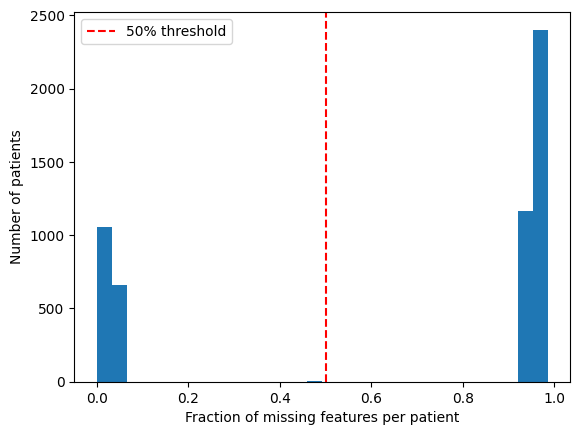

In [ ]:
# Calculate missingness per PATIENT (not per column)
patient_missingness = df.isnull().mean(axis=1)

# Plot distribution
import matplotlib.pyplot as plt
plt.hist(patient_missingness, bins=30)
plt.xlabel('Fraction of missing features per patient')
plt.ylabel('Number of patients')
plt.axvline(x=0.5, color='red', linestyle='--', label='50% threshold')
plt.legend()
plt.show()

In [ ]:
missing_per_row = df_clean.isnull().sum(axis=1)

In [ ]:
row_threshold = int(0.9 * df.shape[1])
filtered_df = df[missing_per_row <= row_threshold]
print(f"Remaining rows: {filtered_df.shape[0]} / {df.shape[0]}")


Remaining rows: 5281 / 5281


In [ ]:
filtered_df.tail()

,PATNO,SEX,AGE,CAUDATE_L,CAUDATE_R,PUTAMEN_L,PUTAMEN_R,EVENT_ID_x,Left_WM_hypointensities,Brain_Stem,...,rh_supramarginal,rh_frontalpole,rh_temporalpole,rh_transversetemporal,rh_insula,rh_MeanThickness,NP3TOT,NHY,APOE4,COHORT_DEFINITION
5276,460321,1,63.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5277,463729,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5278,464174,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5279,466157,0,28.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5280,467477,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 1. Calculate missing percentage per row
row_missing_percent = df.isnull().mean(axis=1)

# 2. Set a threshold — drop rows with > 50% missing
threshold = 0.5
high_missing_rows = row_missing_percent > threshold
print(f"Rows with >50% missing: {high_missing_rows.sum()}")

# 3. Drop them
final_df_filtered = df[~high_missing_rows].reset_index(drop=True)

# 4. Show new shape
print(f"After dropping high-missing rows: {final_df_filtered.shape}")


Rows with >50% missing: 3565
After dropping high-missing rows: (1716, 147)


In [ ]:
final_df_filtered.tail()

,PATNO,SEX,AGE,CAUDATE_L,CAUDATE_R,PUTAMEN_L,PUTAMEN_R,EVENT_ID_x,Left_WM_hypointensities,Brain_Stem,...,rh_supramarginal,rh_frontalpole,rh_temporalpole,rh_transversetemporal,rh_insula,rh_MeanThickness,NP3TOT,NHY,APOE4,COHORT_DEFINITION
1711,219562,0,69.4,NaN,NaN,NaN,NaN,BL,0.0,19164.4,...,2.553,2.970,3.848,1.980,2.906,2.42200,8.0,0.0,NaN,NaN
1712,219621,1,71.0,NaN,NaN,NaN,NaN,BL,0.0,22144.1,...,2.411,2.757,3.721,2.357,3.106,2.31439,4.0,0.0,NaN,NaN
1713,219715,0,69.2,1.74,1.75,0.79,0.91,BL,0.0,21148.1,...,2.504,3.038,4.434,2.080,3.113,2.45693,14.0,1.0,0.0,Parkinson's Disease
1714,220392,1,60.4,NaN,NaN,NaN,NaN,BL,0.0,20067.9,...,2.321,2.848,3.751,1.557,2.932,2.29424,4.0,0.0,NaN,NaN
1715,224562,1,78.0,NaN,NaN,NaN,NaN,BL,0.0,22244.9,...,2.327,2.530,2.960,2.148,2.894,2.24215,14.0,0.0,NaN,NaN


In [ ]:
final_df_filtered.shape

(1716, 147)

In [ ]:
missing_stats = final_df_filtered.isnull().sum().to_frame('Missing Count')
missing_stats['Missing %'] = 100 * missing_stats['Missing Count'] / len(final_df_filtered)
display(missing_stats.sort_values(by='Missing %', ascending=False).head(20))


,Missing Count,Missing %
APOE4,728,42.424242
COHORT_DEFINITION,728,42.424242
PUTAMEN_L,671,39.102564
PUTAMEN_R,671,39.102564
CAUDATE_L,671,39.102564
CAUDATE_R,671,39.102564
NP3TOT,36,2.097902
NHY,23,1.340326
Optic_Chiasm,3,0.174825
BrainSegVol,3,0.174825


In [ ]:
from sklearn.impute import SimpleImputer

# Separate columns
num_cols = final_df_filtered.select_dtypes(include=['float64', 'int64']).columns
cat_cols = final_df_filtered.select_dtypes(include='object').columns

# Impute numerical features (median is robust)
num_imputer = SimpleImputer(strategy='median')
final_df_filtered[num_cols] = num_imputer.fit_transform(final_df_filtered[num_cols])

# Impute categorical features (mode = most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
final_df_filtered[cat_cols] = cat_imputer.fit_transform(final_df_filtered[cat_cols])


In [ ]:
print("Any missing values left?", final_df_filtered.isnull().sum().sum())


Any missing values left? 0


In [ ]:
final_df_filtered.tail()

,PATNO,SEX,AGE,CAUDATE_L,CAUDATE_R,PUTAMEN_L,PUTAMEN_R,EVENT_ID_x,Left_WM_hypointensities,Brain_Stem,...,rh_supramarginal,rh_frontalpole,rh_temporalpole,rh_transversetemporal,rh_insula,rh_MeanThickness,NP3TOT,NHY,APOE4,COHORT_DEFINITION
1711,219562.0,0.0,69.4,2.19,2.21,0.91,0.94,BL,0.0,19164.4,...,2.553,2.970,3.848,1.980,2.906,2.42200,8.0,0.0,0.0,Parkinson's Disease
1712,219621.0,1.0,71.0,2.19,2.21,0.91,0.94,BL,0.0,22144.1,...,2.411,2.757,3.721,2.357,3.106,2.31439,4.0,0.0,0.0,Parkinson's Disease
1713,219715.0,0.0,69.2,1.74,1.75,0.79,0.91,BL,0.0,21148.1,...,2.504,3.038,4.434,2.080,3.113,2.45693,14.0,1.0,0.0,Parkinson's Disease
1714,220392.0,1.0,60.4,2.19,2.21,0.91,0.94,BL,0.0,20067.9,...,2.321,2.848,3.751,1.557,2.932,2.29424,4.0,0.0,0.0,Parkinson's Disease
1715,224562.0,1.0,78.0,2.19,2.21,0.91,0.94,BL,0.0,22244.9,...,2.327,2.530,2.960,2.148,2.894,2.24215,14.0,0.0,0.0,Parkinson's Disease


In [ ]:
cols_to_drop = [
    'EVENT_ID_x',
    'SCAN_DATE',
    'COHORT_DEFINITION',
    # Add any constant columns or administrative IDs if present
]
final_df_cleaned = final_df_filtered.drop(columns=cols_to_drop, errors='ignore')


In [ ]:
final_df_cleaned.columns

Index(['PATNO', 'SEX', 'AGE', 'CAUDATE_L', 'CAUDATE_R', 'PUTAMEN_L',
       'PUTAMEN_R', 'Left_WM_hypointensities', 'Brain_Stem',
       'Left_non_WM_hypointensities',
       ...
       'rh_superiortemporal', 'rh_supramarginal', 'rh_frontalpole',
       'rh_temporalpole', 'rh_transversetemporal', 'rh_insula',
       'rh_MeanThickness', 'NP3TOT', 'NHY', 'APOE4'],
      dtype='object', length=145)

In [ ]:
print(f"Final shape after dropping: {final_df_cleaned.shape}")
final_df_cleaned.info()


Final shape after dropping: (1716, 145)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Columns: 145 entries, PATNO to APOE4
dtypes: float64(144), object(1)
memory usage: 1.9+ MB


**DAT-SPECT Feature Engineering**

In [ ]:
# Total binding for each structure
final_df_cleaned['Putamen_Total'] = final_df_cleaned['PUTAMEN_L'] + final_df_cleaned['PUTAMEN_R']
final_df_cleaned['Caudate_Total'] = final_df_cleaned['CAUDATE_L'] + final_df_cleaned['CAUDATE_R']

# Laterality indices (optional, useful for asymmetry analysis)
final_df_cleaned['Putamen_Asym'] = (final_df_cleaned['PUTAMEN_L'] - final_df_cleaned['PUTAMEN_R']) / (final_df_cleaned['PUTAMEN_L'] + final_df_cleaned['PUTAMEN_R'] + 1e-6)
final_df_cleaned['Caudate_Asym'] = (final_df_cleaned['CAUDATE_L'] - final_df_cleaned['CAUDATE_R']) / (final_df_cleaned['CAUDATE_L'] + final_df_cleaned['CAUDATE_R'] + 1e-6)


In [ ]:
final_df_cleaned = final_df_cleaned.drop(columns=['PUTAMEN_L', 'PUTAMEN_R', 'CAUDATE_L', 'CAUDATE_R'])


In [ ]:
eTIV = 'EstimatedTotalIntraCranialVol'

# Example for a few regions
regions_to_normalize = [
    'Left_Hippocampus', 'Right_Hippocampus',
    'Left_Amygdala', 'Right_Amygdala',
    'CortexVol', 'TotalGrayVol',
    'Left_Putamen', 'Right_Putamen',
    'Left_Caudate', 'Right_Caudate'
]

for region in regions_to_normalize:
    final_df_cleaned[region + '_norm'] = final_df_cleaned[region] / final_df_cleaned[eTIV]

# Drop raw volume columns if needed
final_df_cleaned = final_df_cleaned.drop(columns=regions_to_normalize)


In [ ]:
final_df_cleaned['Hippocampus_Total_norm'] = final_df_cleaned['Left_Hippocampus_norm'] + final_df_cleaned['Right_Hippocampus_norm']
final_df_cleaned['Amygdala_Total_norm'] = final_df_cleaned['Left_Amygdala_norm'] + final_df_cleaned['Right_Amygdala_norm']
final_df_cleaned['Caudate_Total_norm'] = final_df_cleaned['Left_Caudate_norm'] + final_df_cleaned['Right_Caudate_norm']
final_df_cleaned['Putamen_Total_norm'] = final_df_cleaned['Left_Putamen_norm'] + final_df_cleaned['Right_Putamen_norm']

# Drop the L/R norm columns if you use totals
final_df_cleaned = final_df_cleaned.drop(columns=[
    'Left_Hippocampus_norm', 'Right_Hippocampus_norm',
    'Left_Amygdala_norm', 'Right_Amygdala_norm',
    'Left_Caudate_norm', 'Right_Caudate_norm',
    'Left_Putamen_norm', 'Right_Putamen_norm'
])


In [ ]:
print(final_df_cleaned.columns)
final_df_cleaned.head()


Index(['PATNO', 'SEX', 'AGE', 'Left_WM_hypointensities', 'Brain_Stem',
       'Left_non_WM_hypointensities', 'Optic_Chiasm',
       'Right_WM_hypointensities', 'BrainSegVol', 'Right_Lateral_Ventricle',
       ...
       'Putamen_Total', 'Caudate_Total', 'Putamen_Asym', 'Caudate_Asym',
       'CortexVol_norm', 'TotalGrayVol_norm', 'Hippocampus_Total_norm',
       'Amygdala_Total_norm', 'Caudate_Total_norm', 'Putamen_Total_norm'],
      dtype='object', length=141)


,PATNO,SEX,AGE,Left_WM_hypointensities,Brain_Stem,Left_non_WM_hypointensities,Optic_Chiasm,Right_WM_hypointensities,BrainSegVol,Right_Lateral_Ventricle,...,Putamen_Total,Caudate_Total,Putamen_Asym,Caudate_Asym,CortexVol_norm,TotalGrayVol_norm,Hippocampus_Total_norm,Amygdala_Total_norm,Caudate_Total_norm,Putamen_Total_norm
0,3000.0,0.0,69.1,0.0,20725.6,0.0,96.7,0.0,1144050.0,9579.3,...,5.57,6.42,-0.055655,0.068536,0.276552,0.380586,0.005046,0.001680,0.003801,0.005288
1,3001.0,1.0,65.1,0.0,23802.3,0.0,152.0,0.0,1297010.0,17897.3,...,1.45,3.92,-0.103448,-0.020408,0.268779,0.378124,0.005145,0.002145,0.006034,0.007797
2,3002.0,0.0,67.6,0.0,19271.1,0.0,102.1,0.0,1040700.0,8822.4,...,2.79,6.64,0.275986,0.120482,0.299985,0.419209,0.005184,0.002046,0.005387,0.007759
3,3003.0,0.0,56.6,0.0,22191.0,0.0,107.3,0.0,1177320.0,8620.4,...,1.79,6.17,-0.240223,-0.176661,0.277726,0.388823,0.005995,0.002064,0.004245,0.006880
4,3004.0,1.0,59.3,0.0,24473.0,0.0,135.3,0.0,1211960.0,9447.4,...,6.51,10.39,-0.087558,0.020212,0.284486,0.382852,0.005141,0.002137,0.003922,0.006585


In [ ]:
irrelevant_cols = [
    'Left_WM_hypointensities', 'Right_WM_hypointensities', 'non_WM_hypointensities',
    'Left_non_WM_hypointensities', 'Right_non_WM_hypointensities',
    'WM_hypointensities', 'MaskVol', 'MaskVol_to_eTIV', 'SurfaceHoles',
    'lhSurfaceHoles', 'rhSurfaceHoles',
    'Left_vessel', 'Right_vessel',
    '5th_Ventricle', '3rd_Ventricle', '4th_Ventricle',
    'CC_Anterior', 'CC_Posterior', 'CC_Mid_Anterior', 'CC_Mid_Posterior', 'CC_Central',
    'Optic_Chiasm',
    'BrainSegVol', 'BrainSegVol_to_eTIV', 'EstimatedTotalIntraCranialVol',
    'SupraTentorialVol', 'SupraTentorialVolNotVent', 'BrainSegVolNotVent',
    'Left_Lateral_Ventricle', 'Right_Lateral_Ventricle',
    'Left_Inf_Lat_Vent', 'Right_Inf_Lat_Vent',
]


In [ ]:
# Filter irrelevant_cols
cols_to_drop = [col for col in irrelevant_cols if col in final_df_cleaned.columns]

# Drop the filtered columns from the DataFrame
final_df_cleaned = final_df_cleaned.drop(columns=cols_to_drop)

In [ ]:
final_df_cleaned.shape

(1716, 109)

In [ ]:
from google.colab import files


final_df_cleaned.to_csv('final_df_cleaned.csv', index=False)


files.download('final_df_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>